Ingenieria del dato:
Limpieza y preparación de los datos

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



Saving dataset_fraude_bancario_con_hora .xlsx to dataset_fraude_bancario_con_hora .xlsx


comprobación de que la variable es_madrugada mejora el rendimiento del modelo


In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_fraude_bancario_con_hora .xlsx to dataset_fraude_bancario_con_hora  (1).xlsx


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Cargar el archivo
df = pd.read_excel("dataset_fraude_bancario_con_hora  (1).xlsx")

# Crear variable 'as_madrugada'
df['Hora'] = pd.to_datetime(df['Fecha']).dt.hour
df['as_madrugada'] = df['Hora'].apply(lambda x: 1 if 0 <= x < 6 else 0)

# Variables
features_base = ['Monto', 'Ubicación', 'Tipo_Transacción', 'Frecuencia_Usuario']
target = 'Fraude'

# Con as_madrugada
features_con = features_base + ['as_madrugada']
X_con = df[features_con]
y = df[target]

# Sin as_madrugada
X_sin = df[features_base]

# Columnas categóricas y numéricas
categorical_features = ['Ubicación', 'Tipo_Transacción']
numerical_features = ['Monto', 'Frecuencia_Usuario']

# Incluye as_madrugada si aplica
numerical_features_con = numerical_features + ['as_madrugada']

# Preprocesadores
preprocessor_con = ColumnTransformer([
    ('num', 'passthrough', numerical_features_con),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

preprocessor_sin = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Pipelines
pipe_con = Pipeline([
    ('prep', preprocessor_con),
    ('model', LogisticRegression(max_iter=1000))
])

pipe_sin = Pipeline([
    ('prep', preprocessor_sin),
    ('model', LogisticRegression(max_iter=1000))
])

# Train-test split
X_train_con, X_test_con, y_train, y_test = train_test_split(X_con, y, test_size=0.3, random_state=42)
X_train_sin, X_test_sin, _, _ = train_test_split(X_sin, y, test_size=0.3, random_state=42)

# Entrenar modelos
pipe_con.fit(X_train_con, y_train)
pipe_sin.fit(X_train_sin, y_train)

# Predicciones
y_pred_con = pipe_con.predict(X_test_con)
y_pred_sin = pipe_sin.predict(X_test_sin)

# Comparar precisión
acc_con = accuracy_score(y_test, y_pred_con)
acc_sin = accuracy_score(y_test, y_pred_sin)

print(f"Precisión con 'as_madrugada': {acc_con:.4f}")
print(f"Precisión sin 'as_madrugada': {acc_sin:.4f}")



Precisión con 'as_madrugada': 0.9400
Precisión sin 'as_madrugada': 0.9333


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Asegurar formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# ------------------------------------
# MODELO CON 'Fecha' como datetime
# ------------------------------------
df_con_fecha = df.copy()
X_con_fecha = df_con_fecha[['Fecha', 'Monto', 'Ubicación', 'Tipo_Transacción', 'Frecuencia_Usuario']]
y = df_con_fecha['Fraude']

# Convertir fecha a string para one-hot encoding simple
X_con_fecha['Fecha'] = X_con_fecha['Fecha'].astype(str)

preprocessor_con_fecha = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Fecha', 'Ubicación', 'Tipo_Transacción']),
    ('num', 'passthrough', ['Monto', 'Frecuencia_Usuario'])
])

pipe_con_fecha = Pipeline([
    ('prep', preprocessor_con_fecha),
    ('model', LogisticRegression(max_iter=1000))
])

X_train_con, X_test_con, y_train, y_test = train_test_split(X_con_fecha, y, test_size=0.3, random_state=42)
pipe_con_fecha.fit(X_train_con, y_train)
y_pred_con = pipe_con_fecha.predict(X_test_con)
acc_con = accuracy_score(y_test, y_pred_con)

# ------------------------------------
# MODELO SIN 'Fecha'
# ------------------------------------
X_sin_fecha = df[['Monto', 'Ubicación', 'Tipo_Transacción', 'Frecuencia_Usuario']]

preprocessor_sin_fecha = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Ubicación', 'Tipo_Transacción']),
    ('num', 'passthrough', ['Monto', 'Frecuencia_Usuario'])
])

pipe_sin_fecha = Pipeline([
    ('prep', preprocessor_sin_fecha),
    ('model', LogisticRegression(max_iter=1000))
])

X_train_sin, X_test_sin, _, _ = train_test_split(X_sin_fecha, y, test_size=0.3, random_state=42)
pipe_sin_fecha.fit(X_train_sin, y_train)
y_pred_sin = pipe_sin_fecha.predict(X_test_sin)
acc_sin = accuracy_score(y_test, y_pred_sin)

acc_con, acc_sin


<ipython-input-6-1367772752>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_con_fecha['Fecha'] = X_con_fecha['Fecha'].astype(str)


(0.9333333333333333, 0.9366666666666666)

In [7]:
# Crear variables derivadas de 'Fecha'
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['dia_semana'] = df['Fecha'].dt.dayofweek  # Lunes = 0, Domingo = 6
df['fin_de_semana'] = df['dia_semana'].apply(lambda x: 1 if x >= 5 else 0)

# ------------------------------------
# MODELO CON 'dia_semana' y 'fin_de_semana'
# ------------------------------------
X_con_temporal = df[['Monto', 'Ubicación', 'Tipo_Transacción', 'Frecuencia_Usuario', 'dia_semana', 'fin_de_semana']]
y = df['Fraude']

categorical_features_temporal = ['Ubicación', 'Tipo_Transacción']
numerical_features_temporal = ['Monto', 'Frecuencia_Usuario', 'dia_semana', 'fin_de_semana']

preprocessor_temporal = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_temporal),
    ('num', 'passthrough', numerical_features_temporal)
])

pipe_temporal = Pipeline([
    ('prep', preprocessor_temporal),
    ('model', LogisticRegression(max_iter=1000))
])

X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_con_temporal, y, test_size=0.3, random_state=42)
pipe_temporal.fit(X_train_temp, y_train)
y_pred_temp = pipe_temporal.predict(X_test_temp)
acc_temp = accuracy_score(y_test, y_pred_temp)

acc_temp


0.94

In [8]:
import pandas as pd

# Asegurar formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear variable 'as_madrugada': 1 si la transacción ocurre entre las 00:00 y 06:00
df['Hora'] = df['Fecha'].dt.hour
df['as_madrugada'] = df['Hora'].apply(lambda x: 1 if 0 <= x < 6 else 0)

# Crear variable 'fin_de_semana': 1 si es sábado (5) o domingo (6)
df['dia_semana'] = df['Fecha'].dt.dayofweek
df['fin_de_semana'] = df['dia_semana'].apply(lambda x: 1 if x >= 5 else 0)

# Eliminar columnas que ya no se necesitan
df = df.drop(columns=['Fecha', 'Hora', 'dia_semana'])

# Verificar resultado
df.head()


,ID,Monto,Ubicación,Tipo_Transacción,Frecuencia_Usuario,Fraude,as_madrugada,fin_de_semana
0,1,493.01,Brasil,Retiro,34,0,1,0
1,2,171.08,EEUU,Pago,36,0,0,0
2,3,126.86,Colombia,Retiro,21,0,0,0
3,4,142.51,España,Transferencia,45,0,0,0
4,5,44.59,Argentina,Pago,11,0,1,1


In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

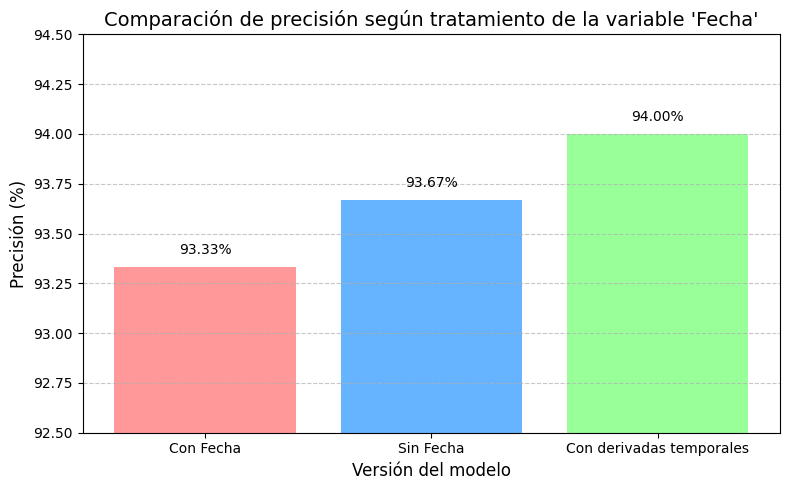

In [10]:
# Importar librerías
import matplotlib.pyplot as plt

# Datos
modelos = ['Con Fecha', 'Sin Fecha', 'Con derivadas temporales']
precisiones = [93.33, 93.67, 94.00]

# Crear gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(modelos, precisiones, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.ylim(92.5, 94.5)
plt.title("Comparación de precisión según tratamiento de la variable 'Fecha'", fontsize=14)
plt.ylabel("Precisión (%)", fontsize=12)
plt.xlabel("Versión del modelo", fontsize=12)

# Añadir etiquetas de valor sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Mejoras estéticas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [15]:
# 1. Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. Cargar el archivo de datos (ajusta el nombre si es distinto)
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('dataset_fraude_bancario_con_hora  (6).xlsx')

# 3. Asegurar que las columnas no tienen espacios en blanco
df.columns = df.columns.str.strip()

# 4. Transformaciones de la variable Fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])                # Asegurar tipo datetime
df['Hora'] = df['Fecha'].dt.hour                         # Extraer hora
df['es_madrugada'] = df['Hora'].apply(lambda x: 1 if 0 <= x < 6 else 0)  # Variable binaria
df['dia_semana'] = df['Fecha'].dt.dayofweek               # Extraer día de la semana
df['fin_de_semana'] = df['dia_semana'].apply(lambda x: 1 if x >= 5 else 0)  # Sábado o domingo

# 5. Eliminar columnas originales que ya no hacen falta
df = df.drop(columns=['Fecha', 'Hora', 'dia_semana'])

# 6. Crear variable es_atipico basada en el rango intercuartílico (IQR) de Monto
Q1 = df['Monto'].quantile(0.25)
Q3 = df['Monto'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df['es_atipico'] = df['Monto'].apply(lambda x: 1 if (x < limite_inferior) or (x > limite_superior) else 0)

# 7. Normalizar las variables numéricas
variables_a_normalizar = ['Monto', 'Frecuencia_Usuario']

scaler = StandardScaler()
df[variables_a_normalizar] = scaler.fit_transform(df[variables_a_normalizar])

# 8. Verificar el resultado
print(df.head())
print("\nColumnas finales del DataFrame:", list(df.columns))


Saving dataset_fraude_bancario_con_hora .xlsx to dataset_fraude_bancario_con_hora  (6).xlsx
   ID     Monto  Ubicación Tipo_Transacción  Frecuencia_Usuario  Fraude  \
0   1  1.574317     Brasil           Retiro            0.619723       0   
1   2 -0.109192       EEUU             Pago            0.760522       0   
2   3 -0.340437   Colombia           Retiro           -0.295465       0   
3   4 -0.258596     España    Transferencia            1.394114       0   
4   5 -0.770661  Argentina             Pago           -0.999456       0   

   es_madrugada  fin_de_semana  es_atipico  
0             1              0           0  
1             0              0           0  
2             0              0           0  
3             0              0           0  
4             1              1           0  

Columnas finales del DataFrame: ['ID', 'Monto', 'Ubicación', 'Tipo_Transacción', 'Frecuencia_Usuario', 'Fraude', 'es_madrugada', 'fin_de_semana', 'es_atipico']


Ingeniería del dato: Análisis exploratorio y descriptivo


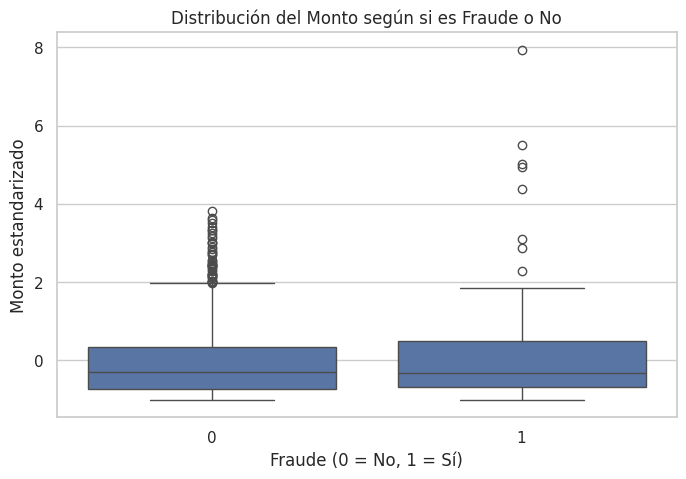

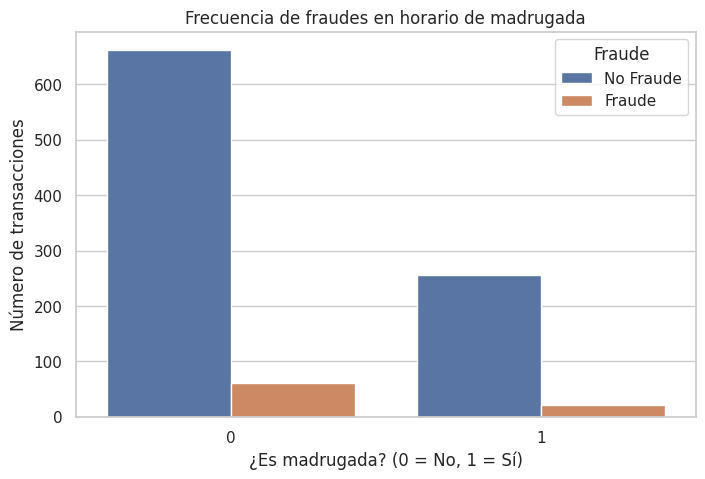

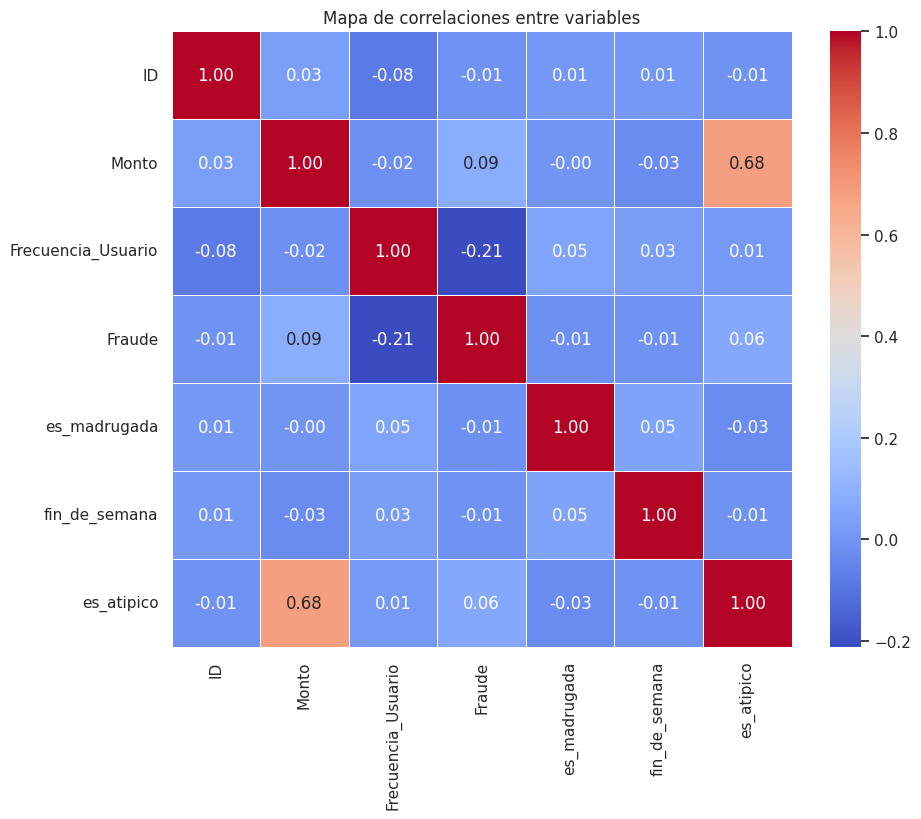

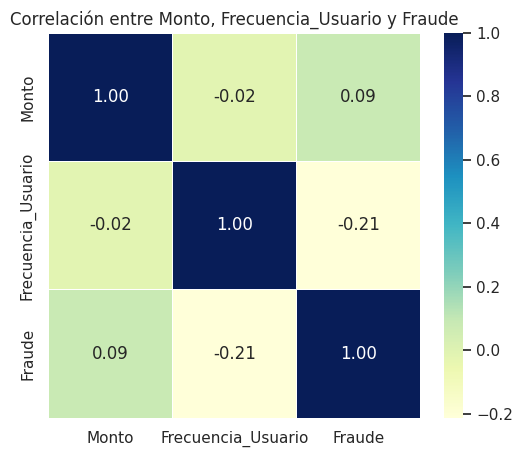

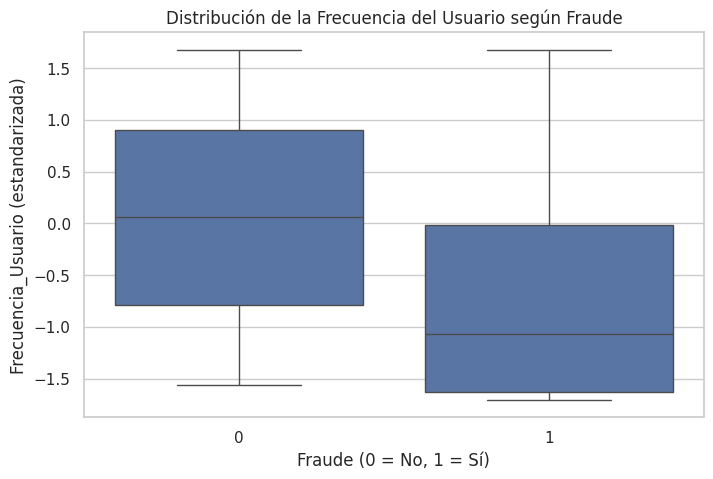

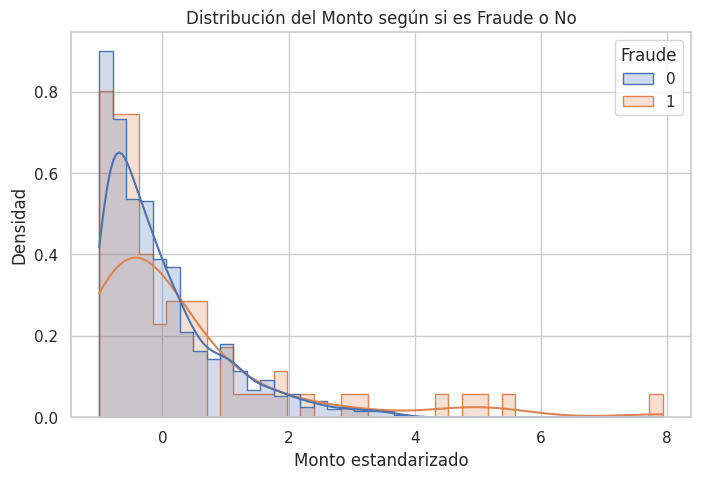

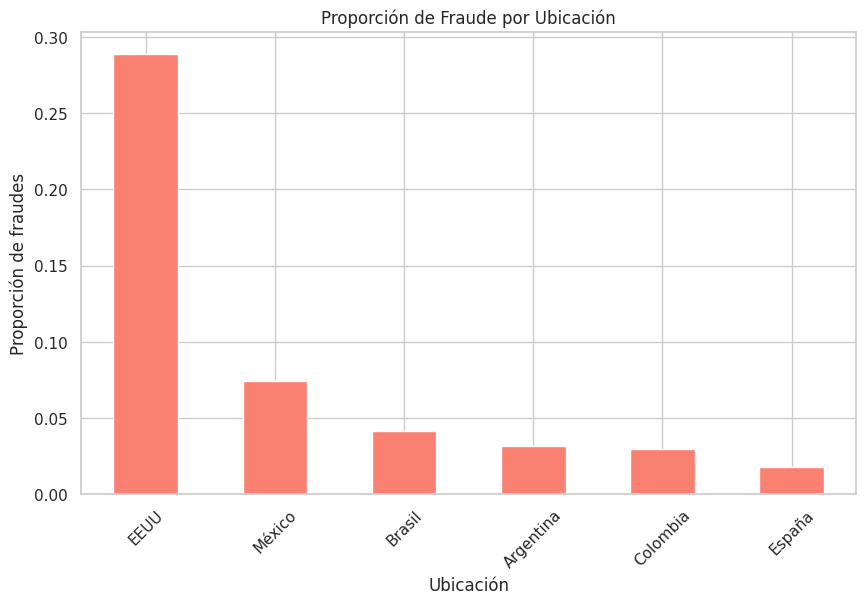

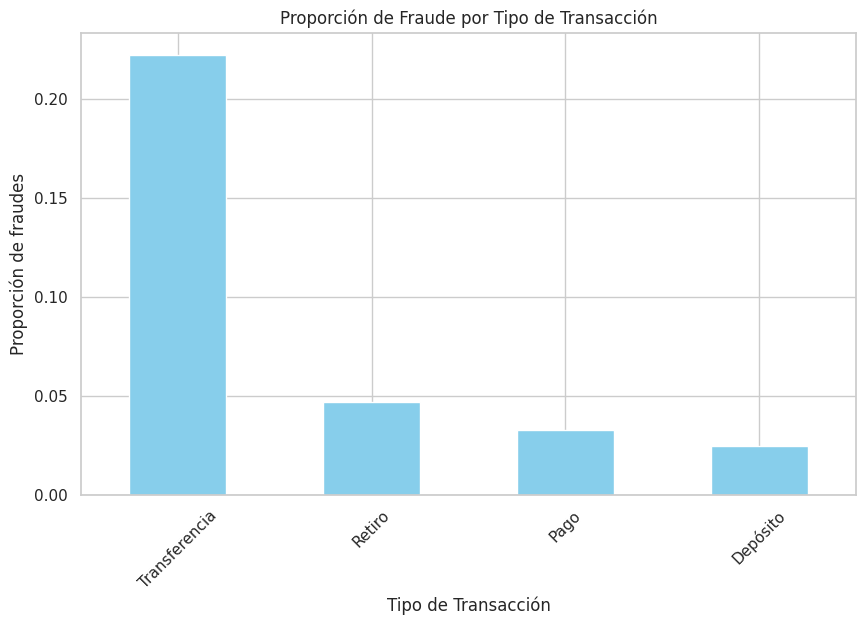

In [19]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración estética de gráficos
sns.set(style="whitegrid")

# --- 1. Boxplot: Distribución del Monto según si es Fraude o no ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraude', y='Monto', data=df)
plt.title('Distribución del Monto según si es Fraude o No')
plt.xlabel('Fraude (0 = No, 1 = Sí)')
plt.ylabel('Monto estandarizado')
plt.show()

# --- 2. Countplot: Frecuencia de fraudes por madrugada (es_madrugada) ---
plt.figure(figsize=(8, 5))
sns.countplot(x='es_madrugada', hue='Fraude', data=df)
plt.title('Frecuencia de fraudes en horario de madrugada')
plt.xlabel('¿Es madrugada? (0 = No, 1 = Sí)')
plt.ylabel('Número de transacciones')
plt.legend(title='Fraude', labels=['No Fraude', 'Fraude'])
plt.show()

# --- 3. Mapa de calor: Correlaciones generales ---
plt.figure(figsize=(10, 8))

# Filtrar solo columnas numéricas
numericas = df.select_dtypes(include=['number'])

# Calcular y graficar correlaciones
correlaciones = numericas.corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de correlaciones entre variables')
plt.show()

# --- 4. Mapa de calor: Correlaciones seleccionadas ---
plt.figure(figsize=(6, 5))
variables_relevantes = ['Monto', 'Frecuencia_Usuario', 'Fraude']

sns.heatmap(df[variables_relevantes].corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre Monto, Frecuencia_Usuario y Fraude')
plt.show()

# --- 5. Boxplot: Distribución de la Frecuencia del Usuario según Fraude ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraude', y='Frecuencia_Usuario', data=df)
plt.title('Distribución de la Frecuencia del Usuario según Fraude')
plt.xlabel('Fraude (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia_Usuario (estandarizada)')
plt.show()

# --- 6. Histograma: Distribución del Monto en función del Fraude ---
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Monto', hue='Fraude', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribución del Monto según si es Fraude o No')
plt.xlabel('Monto estandarizado')
plt.ylabel('Densidad')
plt.show()

# --- 7. Proporción de Fraude por Ubicación ---
if 'Ubicación' in df.columns:
    plt.figure(figsize=(10, 6))
    fraude_por_ubicacion = df.groupby('Ubicación')['Fraude'].mean().sort_values(ascending=False)
    fraude_por_ubicacion.plot(kind='bar', color='salmon')
    plt.title('Proporción de Fraude por Ubicación')
    plt.ylabel('Proporción de fraudes')
    plt.xlabel('Ubicación')
    plt.xticks(rotation=45)
    plt.show()

# --- 8. Proporción de Fraude por Tipo de Transacción ---
if 'Tipo_Transacción' in df.columns:
    plt.figure(figsize=(10, 6))
    fraude_por_tipo = df.groupby('Tipo_Transacción')['Fraude'].mean().sort_values(ascending=False)
    fraude_por_tipo.plot(kind='bar', color='skyblue')
    plt.title('Proporción de Fraude por Tipo de Transacción')
    plt.ylabel('Proporción de fraudes')
    plt.xlabel('Tipo de Transacción')
    plt.xticks(rotation=45)
    plt.show()


Analisis del dato: El tratamiento del componente temporal en los modelos aplicados

In [16]:
df.columns


Index(['ID', 'Monto', 'Ubicación', 'Tipo_Transacción', 'Frecuencia_Usuario',
       'Fraude', 'es_madrugada', 'fin_de_semana', 'es_atipico'],
      dtype='object')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


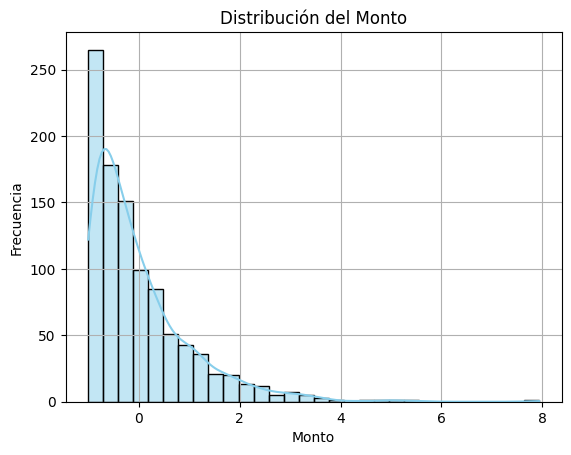

In [18]:
sns.histplot(data=df, x='Monto', kde=True, bins=30, color='skyblue')
plt.title('Distribución del Monto')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


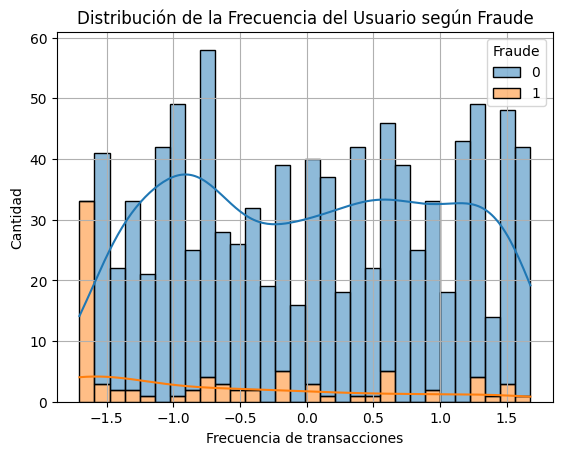

In [19]:
sns.histplot(data=df, x='Frecuencia_Usuario', hue='Fraude', kde=True, bins=30, multiple='stack')
plt.title('Distribución de la Frecuencia del Usuario según Fraude')
plt.xlabel('Frecuencia de transacciones')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()


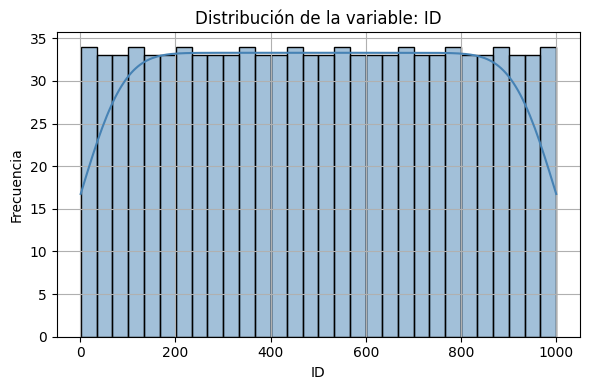

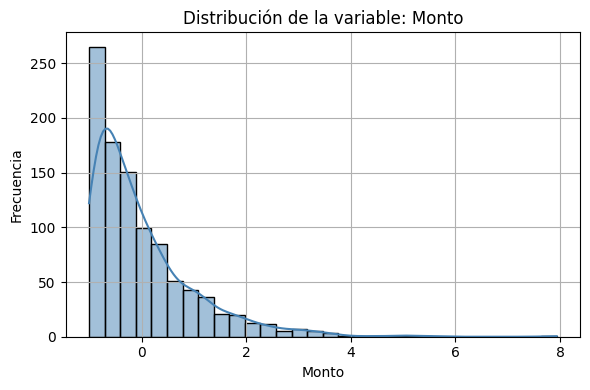

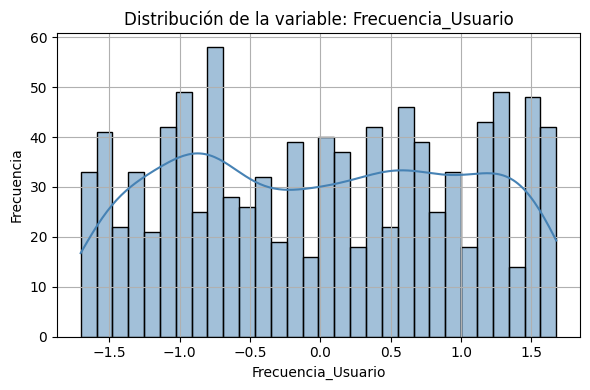

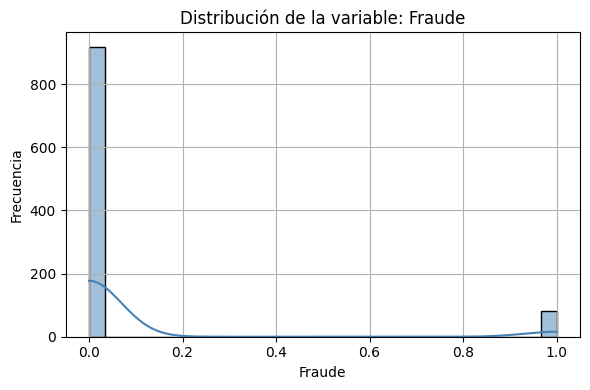

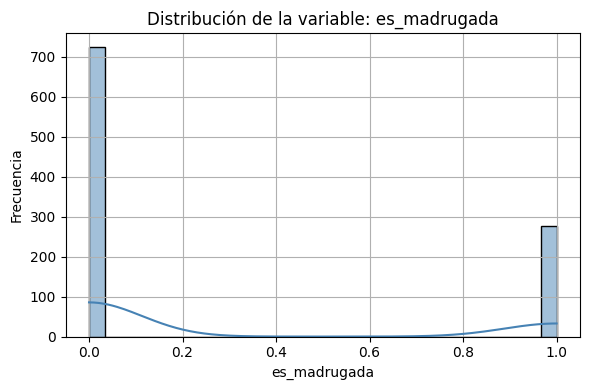

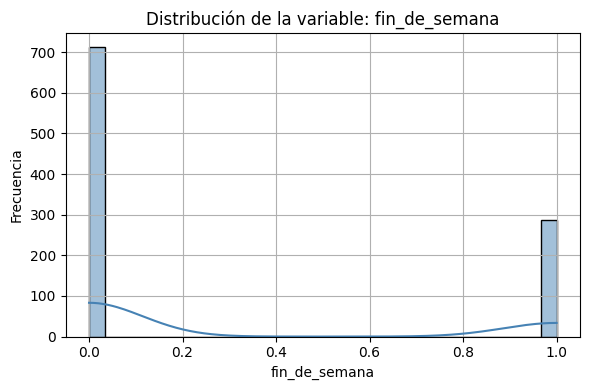

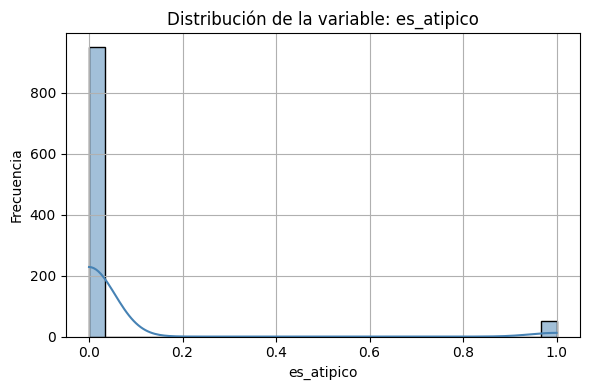

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Iteramos sobre cada variable numérica para graficar su histograma
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribución de la variable: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


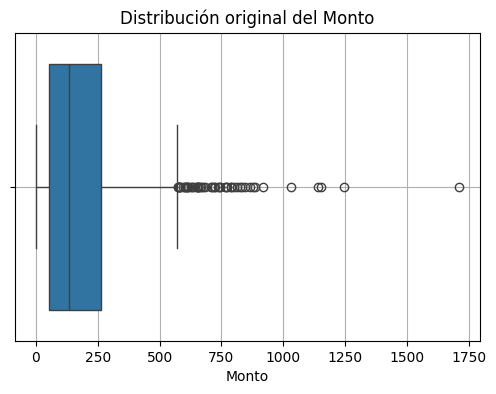

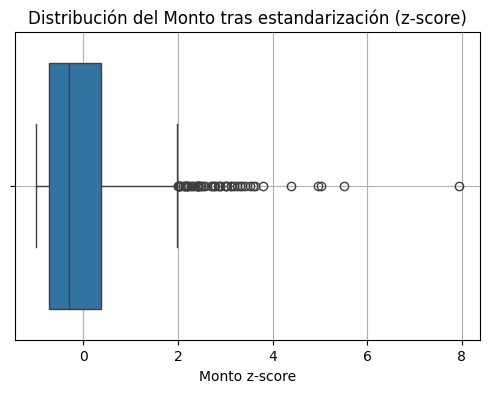

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Cargar tu dataset
# Asegúrate de tener cargado tu archivo .xlsx previamente en Colab
df = pd.read_excel("dataset_fraude_bancario_con_hora .xlsx")

# Boxplot del Monto original
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Monto')
plt.title('Distribución original del Monto')
plt.xlabel('Monto')
plt.grid(True)
plt.show()

# Estandarizar el Monto
scaler = StandardScaler()
df['Monto_zscore'] = scaler.fit_transform(df[['Monto']])

# Boxplot del Monto estandarizado
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Monto_zscore')
plt.title('Distribución del Monto tras estandarización (z-score)')
plt.xlabel('Monto z-score')
plt.grid(True)
plt.show()


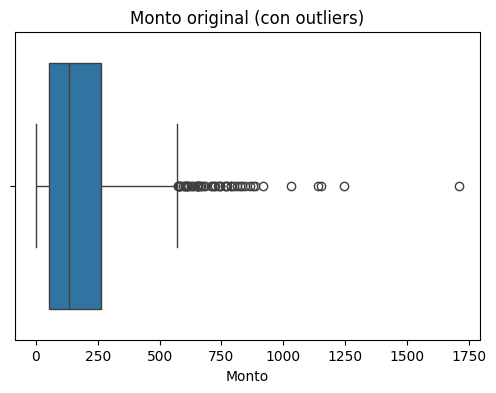

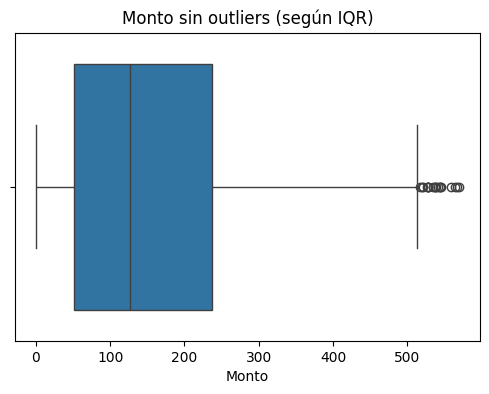

In [25]:
# Calcular IQR
Q1 = df['Monto'].quantile(0.25)
Q3 = df['Monto'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar dataset sin outliers
df_sin_outliers = df[(df['Monto'] >= lower_bound) & (df['Monto'] <= upper_bound)]

# Plot con outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Monto'])
plt.title("Monto original (con outliers)")
plt.show()

# Plot sin outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_sin_outliers['Monto'])
plt.title("Monto sin outliers (según IQR)")
plt.show()


In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='es_atipico', y='Monto')
plt.title('Distribución del Monto según si es atípico')
plt.xlabel('es_atipico (0 = normal, 1 = atípico)')
plt.ylabel('Monto')
plt.grid(True)
plt.show()


ValueError: Could not interpret value `es_atipico` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

T_TRAIN , T_TEST

In [21]:
from google.colab import files
uploaded = files.upload()


Saving dataset_fraude_bancario_con_hora .xlsx to dataset_fraude_bancario_con_hora  (2).xlsx


In [22]:
X = df[['Monto', 'Frecuencia_Usuario', 'es_madrugada', 'fin_de_semana', 'es_atipico']]
y = df['Fraude']


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Paso 1: Cargar Exc
df = pd.read_excel('/content/dataset_fraude_bancario_con_hora  (2).xlsx')
df.columns = df.columns.str.strip()  # elimina espacios ocultos


In [27]:
# Paso 2: Crear columna 'hora' a partir de 'Fecha'
df['hora'] = pd.to_datetime(df['Fecha']).dt.hour

In [28]:
# Paso 3: Crear variable binaria 'es_madrugada'
df['es_madrugada'] = df['hora'].apply(lambda x: 1 if 0 <= x <= 6 else 0)

# Paso 4: Crear variable 'fin_de_semana' a partir del día de la semana
df['dia_semana'] = pd.to_datetime(df['Fecha']).dt.dayofweek  # lunes=0, domingo=6
df['fin_de_semana'] = df['dia_semana'].apply(lambda x: 1 if x >= 5 else 0)


In [29]:
Q1 = df['Monto'].quantile(0.25)
Q3 = df['Monto'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df['es_atipico'] = df['Monto'].apply(lambda x: 1 if (x < limite_inferior or x > limite_superior) else 0)


In [30]:
X = df[['Monto', 'Frecuencia_Usuario', 'es_madrugada', 'fin_de_semana', 'es_atipico']]
y = df['Fraude']


In [31]:
# Paso 7: División del dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
print("✅ División realizada correctamente.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Proporción de fraude en y_train:", round(y_train.mean(), 4))
print("Proporción de fraude en y_test:", round(y_test.mean(), 4))

✅ División realizada correctamente.
Train shape: (800, 5)
Test shape: (200, 5)
Proporción de fraude en y_train: 0.0825
Proporción de fraude en y_test: 0.08


MODELO DE REGRESIÓN LOGISTICA

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# División en entrenamiento y test
X = df[['Monto', 'Frecuencia_Usuario', 'es_madrugada', 'fin_de_semana', 'es_atipico']]
y = df['Fraude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)


LogisticRegression()

In [36]:
# Ver coeficientes del modelo
coeficientes = modelo_logistico.coef_[0]
intercept = modelo_logistico.intercept_[0]
variables = X_train.columns

# Mostrar ecuación en formato texto
print("Ecuación estimada del modelo logístico:")
print(f"log(P/(1-P)) = {intercept:.4f}", end=" ")

for var, b in zip(variables, coeficientes):
    signo = "+" if b >= 0 else "-"
    print(f"{signo} {abs(b):.4f} * {var}", end=" ")


Ecuación estimada del modelo logístico:
log(P/(1-P)) = -1.6755 + 0.0021 * Monto - 0.0613 * Frecuencia_Usuario - 0.1279 * es_madrugada + 0.0133 * fin_de_semana + 0.0699 * es_atipico 

In [37]:
import statsmodels.api as sm
import pandas as pd

# Añadir constante al X_train
X_train_const = sm.add_constant(X_train)

# Ajustar modelo con statsmodels
modelo_stats = sm.Logit(y_train, X_train_const).fit()

# Ver resumen completo
modelo_stats.summary()


Optimization terminated successfully.
         Current function value: 0.239917
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Fraude   No. Observations:                  700
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                  0.1054
Time:                        14:44:24   Log-Likelihood:                -167.94
converged:                       True   LL-Null:                       -187.72
Covariance Type:            nonrobust   LLR p-value:                 1.831e-07
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6672      0.327     -5.097      0.000      -2.308      -1.026
Monto                  0.0020      0.001      2.248      0.025       0.000       0.004
Frecuencia_Usuario    -0.0613      0.012     -4.917      0.000      -0.086      -0.037
es_madrugada          -0.1409      0.329     -0.428      0.669      -0.787       0.505
fin_de_semana          0.0147      0.335      0.044      0.965      -0.642       0.671
es_atipico             0.1042      0.724      0.144      0.886      -1.315       1.524
======================================================================================
"""

In [38]:
# Crear DataFrame con coeficientes y p-valores
tabla_coef = modelo_stats.summary2().tables[1][['Coef.', 'P>|z|']]
tabla_coef['B/4'] = tabla_coef['Coef.'] / 4

# Añadir interpretación rápida (solo como texto de ejemplo)
def interpretar(row):
    if row.name == 'Monto':
        return "A mayor cantidad, mayor probabilidad de fraude"
    elif row.name == 'Frecuencia_Usuario':
        return "Usuarios frecuentes tienen menor riesgo"
    elif row.name == 'es_madrugada':
        return "Ligera mayor probabilidad de fraude"
    elif row.name == 'es_atipico':
        return "Montos atípicos ligeramente más riesgosos"
    elif row.name == 'fin_de_semana':
        return "Las operaciones en fin de semana muestran leve aumento de riesgo"
    else:
        return ""

tabla_coef['Interpretación'] = tabla_coef.apply(interpretar, axis=1)

import numpy as np
tabla_coef['Significativo?'] = tabla_coef['P>|z|'].apply(lambda p: "Sí" if p < 0.05 else ("Ligeramente" if p < 0.10 else "No"))

# Mostrar tabla
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
display(tabla_coef)


,Coef.,P>|z|,B/4,Interpretación,Significativo?
const,-1.667245,3.447328e-07,-0.416811,,Sí
Monto,0.002032,2.456021e-02,0.000508,"A mayor cantidad, mayor probabilidad de fraude",Sí
Frecuencia_Usuario,-0.061348,8.787873e-07,-0.015337,Usuarios frecuentes tienen menor riesgo,Sí
es_madrugada,-0.140878,6.689469e-01,-0.035219,Ligera mayor probabilidad de fraude,No
fin_de_semana,0.014707,9.649882e-01,0.003677,Las operaciones en fin de semana muestran leve...,No
es_atipico,0.104249,8.855418e-01,0.026062,Montos atípicos ligeramente más riesgosos,No


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Predecimos probabilidades con sklearn
y_pred_prob = modelo_logistico.predict_proba(X_test)[:, 1]

# Convertimos a predicción binaria con umbral 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Mostramos matriz de confusión y métricas
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))


Matriz de confusión:
[[271   0]
 [ 29   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9033    1.0000    0.9492       271
           1     0.0000    0.0000    0.0000        29

    accuracy                         0.9033       300
   macro avg     0.4517    0.5000    0.4746       300
weighted avg     0.8160    0.9033    0.8575       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Selección de variables
X = df[['Monto', 'Frecuencia_Usuario', 'es_madrugada', 'fin_de_semana', 'es_atipico']]
y = df['Fraude']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo sin balanceo
modelo_sin = LogisticRegression(max_iter=1000)
modelo_sin.fit(X_train, y_train)
y_pred_sin = modelo_sin.predict(X_test)

# Modelo con balanceo
modelo_bal = LogisticRegression(class_weight='balanced', max_iter=1000)
modelo_bal.fit(X_train, y_train)
y_pred_bal = modelo_bal.predict(X_test)


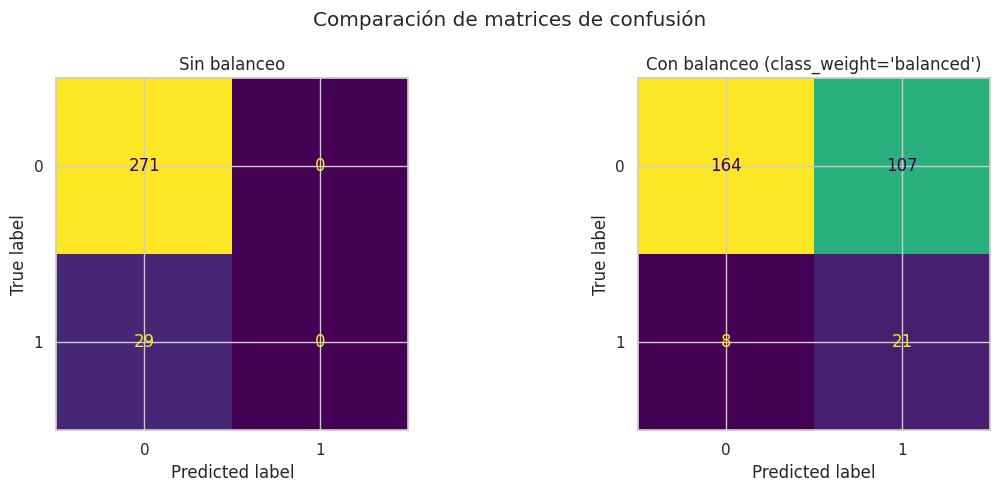

In [43]:
# Dibujar ambas matrices de confusión
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sin, ax=axs[0], colorbar=False)
axs[0].set_title("Sin balanceo")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bal, ax=axs[1], colorbar=False)
axs[1].set_title("Con balanceo (class_weight='balanced')")

plt.suptitle("Comparación de matrices de confusión")
plt.tight_layout()
plt.show()


In [44]:
print("🔴 Modelo SIN balanceo:\n")
print(classification_report(y_test, y_pred_sin, digits=4))

print("\n🟢 Modelo CON balanceo:\n")
print(classification_report(y_test, y_pred_bal, digits=4))


🔴 Modelo SIN balanceo:

              precision    recall  f1-score   support

           0     0.9033    1.0000    0.9492       271
           1     0.0000    0.0000    0.0000        29

    accuracy                         0.9033       300
   macro avg     0.4517    0.5000    0.4746       300
weighted avg     0.8160    0.9033    0.8575       300


🟢 Modelo CON balanceo:

              precision    recall  f1-score   support

           0     0.9535    0.6052    0.7404       271
           1     0.1641    0.7241    0.2675        29

    accuracy                         0.6167       300
   macro avg     0.5588    0.6647    0.5040       300
weighted avg     0.8772    0.6167    0.6947       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


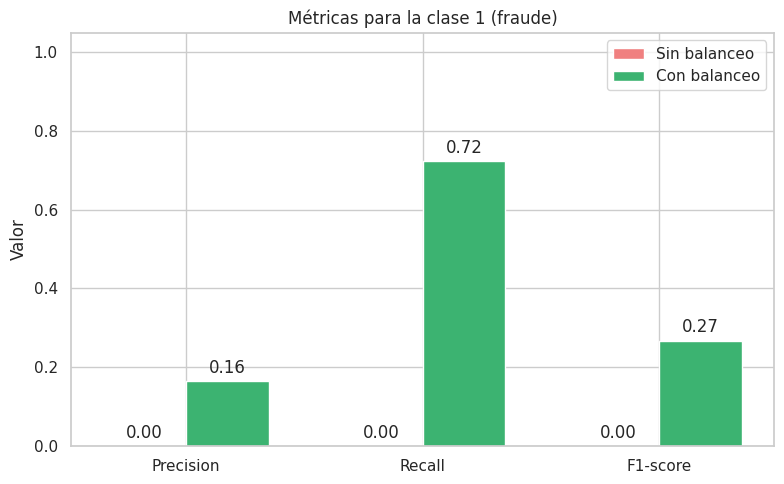

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Calcular métricas para clase 1 (fraude)
metrics = ['Precision', 'Recall', 'F1-score']
sin_balanceo = [
    precision_score(y_test, y_pred_sin, pos_label=1, zero_division=0),
    recall_score(y_test, y_pred_sin, pos_label=1, zero_division=0),
    f1_score(y_test, y_pred_sin, pos_label=1, zero_division=0)
]
con_balanceo = [
    precision_score(y_test, y_pred_bal, pos_label=1, zero_division=0),
    recall_score(y_test, y_pred_bal, pos_label=1, zero_division=0),
    f1_score(y_test, y_pred_bal, pos_label=1, zero_division=0)
]

# Crear gráfico
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, sin_balanceo, width, label='Sin balanceo', color='lightcoral')
bars2 = ax.bar(x + width/2, con_balanceo, width, label='Con balanceo', color='mediumseagreen')

# Etiquetas
ax.set_ylabel('Valor')
ax.set_title('Métricas para la clase 1 (fraude)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1.05)

# Mostrar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


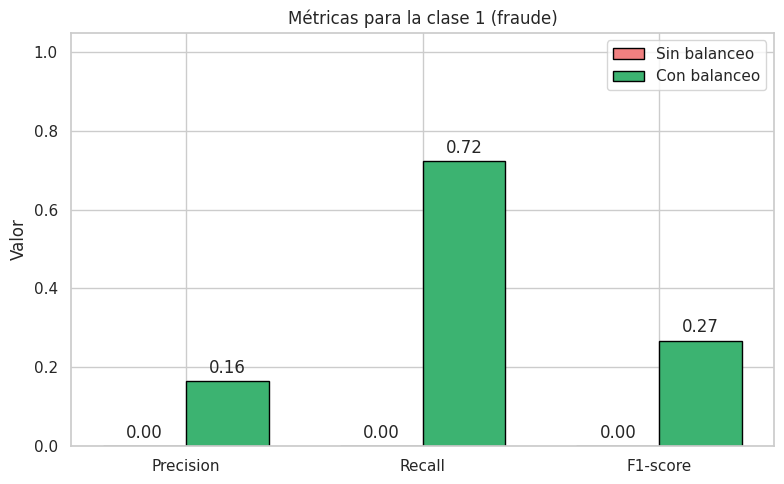

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width/2, sin_balanceo, width, label='Sin balanceo', color='lightcoral', edgecolor='black')
bars2 = ax.bar(x + width/2, con_balanceo, width, label='Con balanceo', color='mediumseagreen', edgecolor='black')

# Etiquetas
ax.set_ylabel('Valor')
ax.set_title('Métricas para la clase 1 (fraude)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1.05)

# Mostrar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


metricas de error de la regresión logistica

In [48]:
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

# Calculamos métricas de evaluación adicionales
logloss = log_loss(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
brier = brier_score_loss(y_test, y_pred_prob)

# Mostramos los resultados formateados
print("📊 MÉTRICAS ADICIONALES DEL MODELO LOGÍSTICO BALANCEADO\n")
print(f"🔹 Log-loss           : {logloss:.4f}")
print(f"🔹 AUC (ROC)          : {auc:.4f}")
print(f"🔹 Brier Score Loss   : {brier:.4f}")


📊 MÉTRICAS ADICIONALES DEL MODELO LOGÍSTICO BALANCEADO

🔹 Log-loss           : 0.2975
🔹 AUC (ROC)          : 0.7152
🔹 Brier Score Loss   : 0.0831


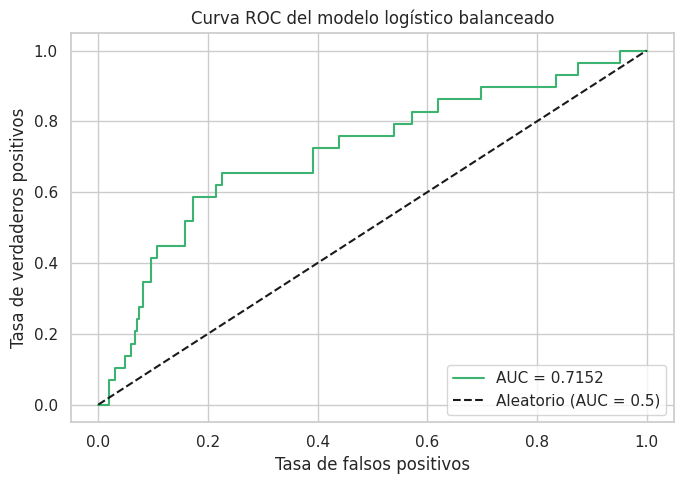

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculamos curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Graficamos curva
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='mediumseagreen')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC del modelo logístico balanceado')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


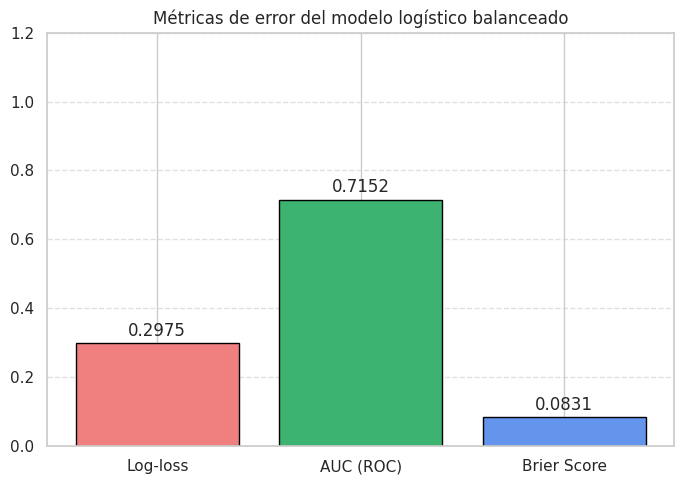

In [50]:
# Datos
metricas = ['Log-loss', 'AUC (ROC)', 'Brier Score']
valores = [logloss, auc, brier]

# Colores diferenciados
colores = ['lightcoral', 'mediumseagreen', 'cornflowerblue']

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
bars = plt.bar(metricas, valores, color=colores, edgecolor='black')

# Añadir valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

# Estética
plt.title('Métricas de error del modelo logístico balanceado')
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


ARBOL DE DECISIÓN

In [51]:
from google.colab import files
uploaded = files.upload()

Saving dataset_fraude_bancario_con_hora .xlsx to dataset_fraude_bancario_con_hora  (3).xlsx


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Paso 1: Cargar Excel
df = pd.read_excel('/content/dataset_fraude_bancario_con_hora  (3).xlsx')
df.columns = df.columns.str.strip()  # elimina espacios oculto

In [54]:
# Paso 2: Crear columna 'hora' a partir de 'Fecha'
df['hora'] = pd.to_datetime(df['Fecha']).dt.hour

In [55]:
# Paso 3: Crear variable binaria 'es_madrugada'
df['es_madrugada'] = df['hora'].apply(lambda x: 1 if 0 <= x <= 6 else 0)

# Paso 4: Crear variable 'fin_de_semana' a partir del día de la semana
df['dia_semana'] = pd.to_datetime(df['Fecha']).dt.dayofweek  # lunes=0, domingo=6
df['fin_de_semana'] = df['dia_semana'].apply(lambda x: 1 if x >= 5 else 0)

In [56]:
Q1 = df['Monto'].quantile(0.25)
Q3 = df['Monto'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df['es_atipico'] = df['Monto'].apply(lambda x: 1 if (x < limite_inferior or x > limite_superior) else 0)

In [57]:
X = df[['Monto', 'Frecuencia_Usuario', 'es_madrugada', 'fin_de_semana', 'es_atipico']]
y = df['Fraude']

In [58]:
# Paso 7: División del dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [59]:
print("✅ División realizada correctamente.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Proporción de fraude en y_train:", round(y_train.mean(), 4))
print("Proporción de fraude en y_test:", round(y_test.mean(), 4))

✅ División realizada correctamente.
Train shape: (800, 5)
Test shape: (200, 5)
Proporción de fraude en y_train: 0.0825
Proporción de fraude en y_test: 0.08


In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Entrenamiento del árbol de decisión
arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
arbol.fit(X_train, y_train)

# 2. Predicciones
y_pred_arbol = arbol.predict(X_test)

# 3. Métricas de evaluación
print("Accuracy:", round(accuracy_score(y_test, y_pred_arbol), 4))
print("Precision:", round(precision_score(y_test, y_pred_arbol), 4))
print("Recall:", round(recall_score(y_test, y_pred_arbol), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_arbol), 4))


Accuracy: 0.965
Precision: 1.0
Recall: 0.5625
F1 Score: 0.72


In [63]:
DecisionTreeClassifier(class_weight='balanced')


DecisionTreeClassifier(class_weight='balanced')

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo con todas las mejoras
modelo_arbol = DecisionTreeClassifier(
    class_weight='balanced',    # balanceo de clases
    max_depth=4,                # limitar profundidad para evitar sobreajuste
    min_samples_leaf=5,         # evitar nodos con muy pocos datos
    random_state=42
)

# Entrenar
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       random_state=42)

In [65]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validación cruzada con scoring por F1 para la clase positiva (fraude)
scores_f1 = cross_val_score(modelo_arbol, X_train, y_train, cv=5, scoring='f1')
print("F1-score medio (cv):", np.mean(scores_f1))

# También puedes evaluar accuracy o balanced accuracy
scores_bal = cross_val_score(modelo_arbol, X_train, y_train, cv=5, scoring='balanced_accuracy')
print("Balanced accuracy (cv):", np.mean(scores_bal))


F1-score medio (cv): 0.4329824561403508
Balanced accuracy (cv): 0.6868655154369441


In [66]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, balanced_accuracy_score

# Predecir
y_pred = modelo_arbol.predict(X_test)
y_prob = modelo_arbol.predict_proba(X_test)[:,1]  # Para métricas basadas en probabilidad

# Métricas de evaluación
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Average Precision Score:", average_precision_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Balanced Accuracy: 0.78125
ROC AUC: 0.7401494565217391
Average Precision Score: 0.6016515192620727

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       184
           1       1.00      0.56      0.72        16

    accuracy                           0.96       200
   macro avg       0.98      0.78      0.85       200
weighted avg       0.97      0.96      0.96       200


Matriz de Confusión:
[[184   0]
 [  7   9]]


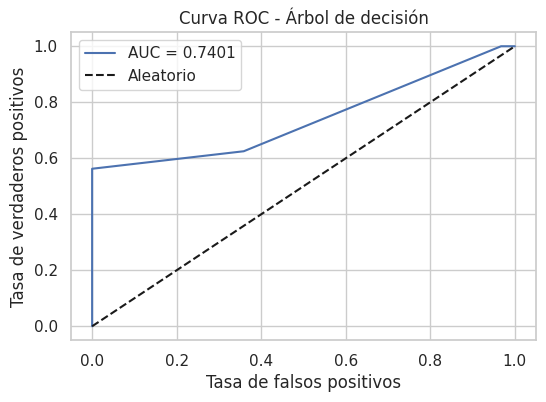

In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Árbol de decisión')
plt.legend()
plt.grid(True)
plt.show()


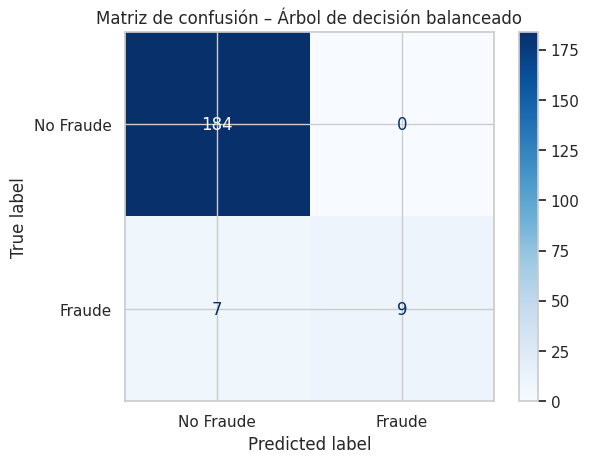

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir con el modelo ya entrenado con class_weight='balanced'
y_pred = modelo_arbol.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraude', 'Fraude'])
disp.plot(cmap='Blues')
plt.title('Matriz de confusión – Árbol de decisión balanceado')
plt.show()


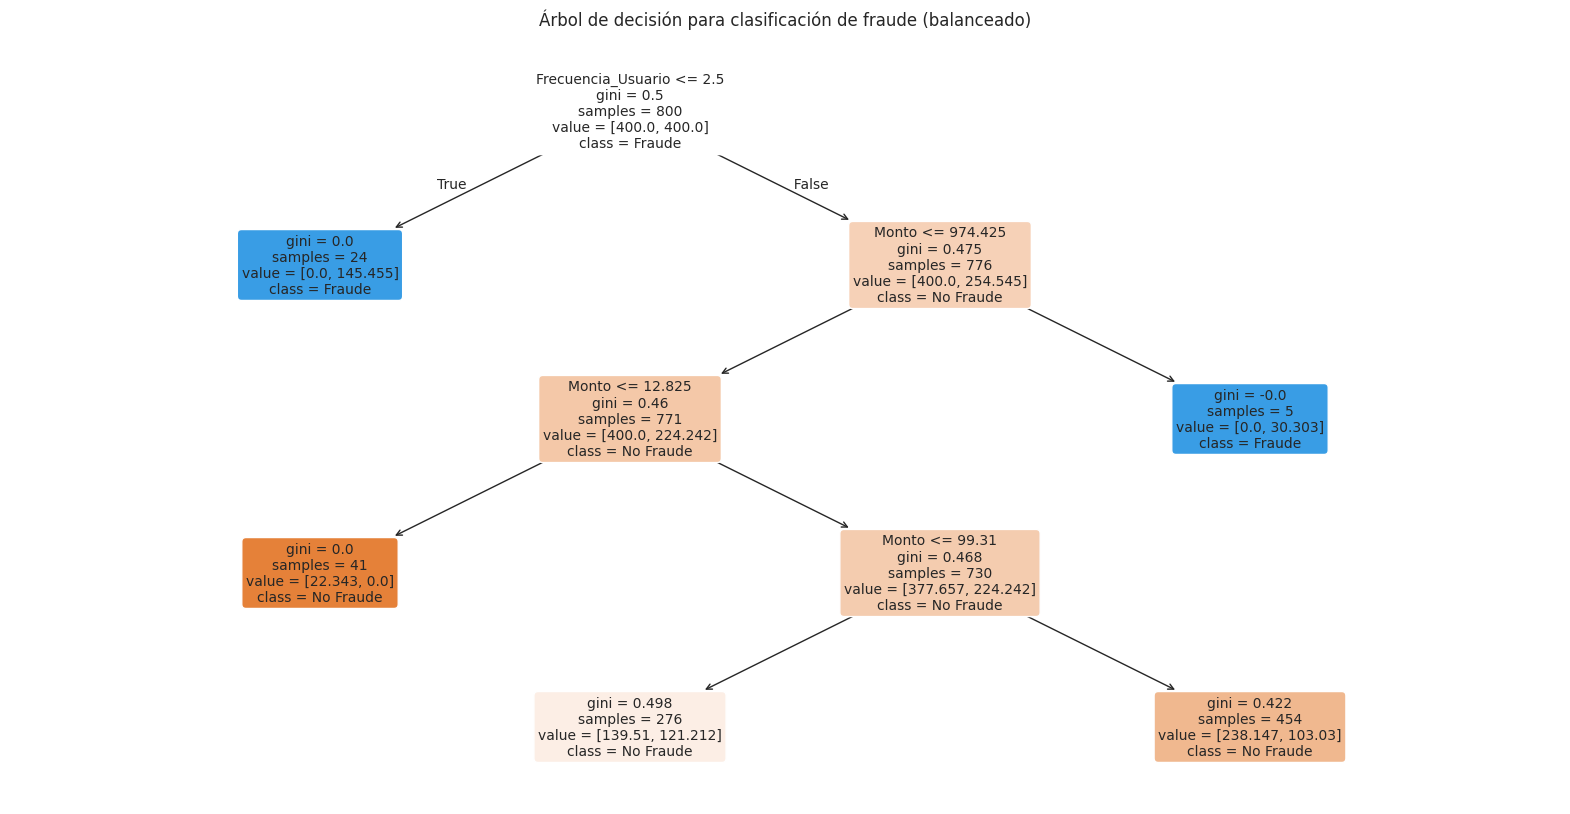

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(
    modelo_arbol,
    feature_names=X.columns,       # O usa X_train.columns si es un DataFrame
    class_names=["No Fraude", "Fraude"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de decisión para clasificación de fraude (balanceado)")
plt.show()


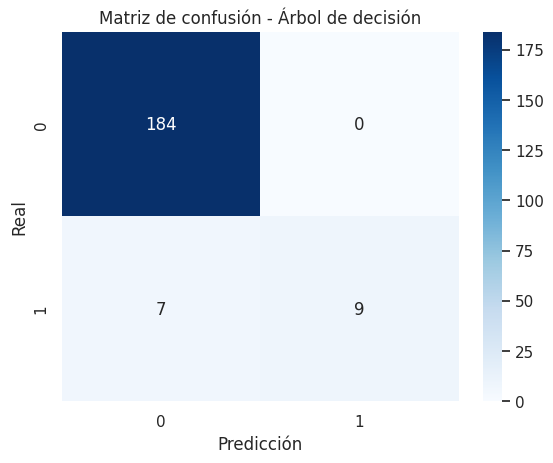

In [61]:
cm = confusion_matrix(y_test, y_pred_arbol)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Árbol de decisión")
plt.show()


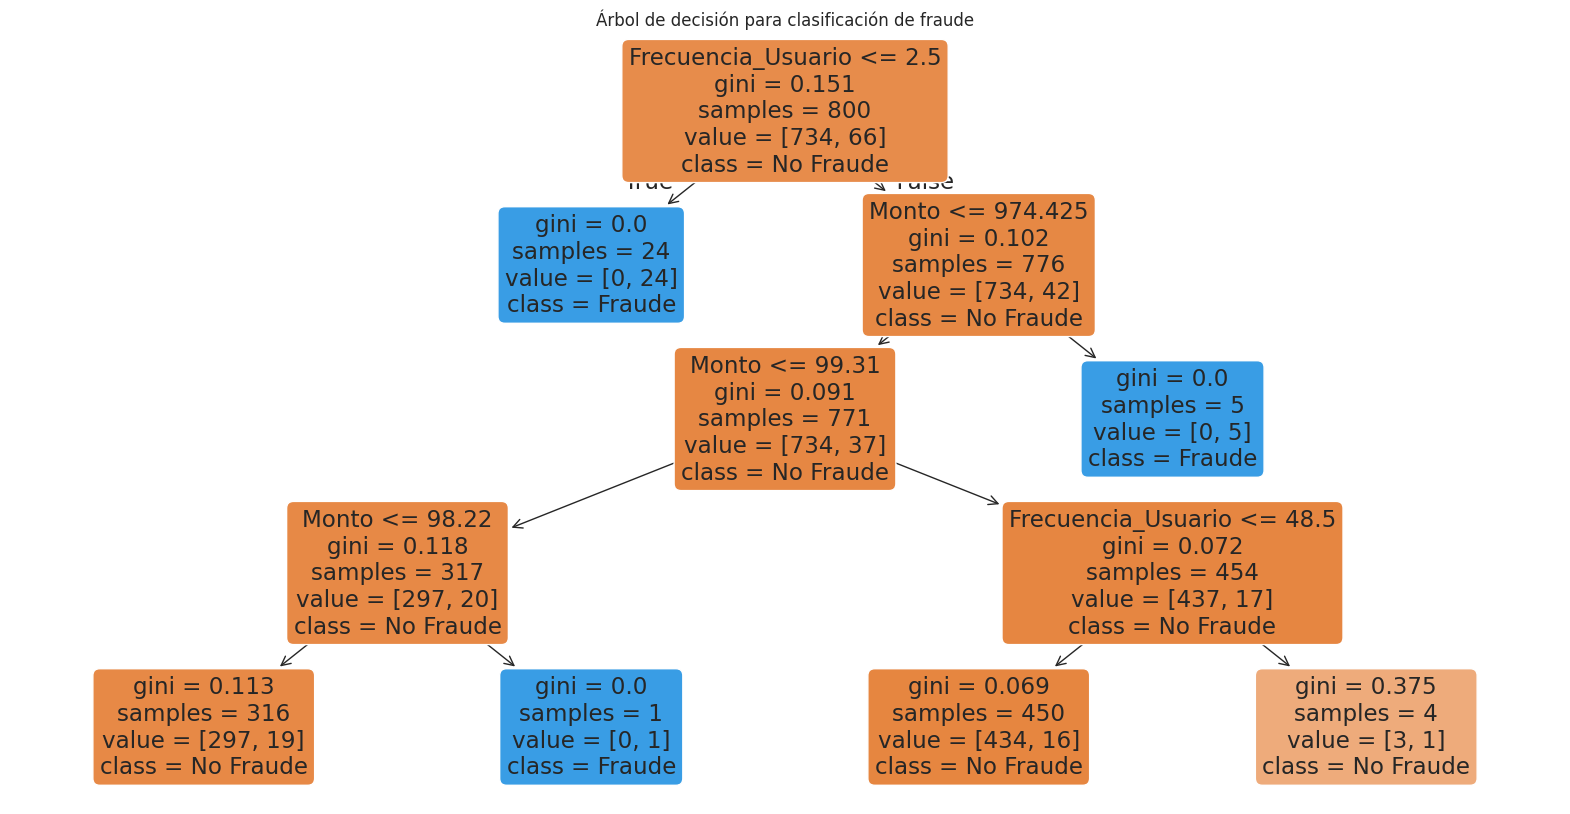

In [62]:
plt.figure(figsize=(20, 10))
plot_tree(arbol,
          feature_names=X_train.columns,
          class_names=["No Fraude", "Fraude"],
          filled=True,
          rounded=True)
plt.title("Árbol de decisión para clasificación de fraude")
plt.show()


K-MEANS

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_fraude_bancario_con_hora .xlsx to dataset_fraude_bancario_con_hora .xlsx


In [3]:
# 1. Cargar el dataset
import pandas as pd

df = pd.read_excel('/content/dataset_fraude_bancario_con_hora .xlsx')

# 2. Crear variables necesarias para K-Means

# Convertir 'Fecha' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer la hora y crear 'es_madrugada'
df['Hora'] = df['Fecha'].dt.hour
df['es_madrugada'] = df['Hora'].apply(lambda x: 1 if 0 <= x < 6 else 0)

# Crear 'es_atipico' usando IQR del monto
Q1 = df['Monto'].quantile(0.25)
Q3 = df['Monto'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
df['es_atipico'] = df['Monto'].apply(lambda x: 1 if x < lim_inf or x > lim_sup else 0)

# Crear 'fin_de_semana'
df['fin_de_semana'] = df['Fecha'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)




In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Variables seleccionadas
variables_kmeans = ['Monto', 'Frecuencia_Usuario', 'es_madrugada', 'es_atipico', 'fin_de_semana']
X_kmeans = df[variables_kmeans]

# Normalización Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# K-Means con 2 clústeres
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Comparar con la variable real 'Fraude'
print("Distribución de fraude por clúster:")
print(pd.crosstab(df['Cluster'], df['Fraude'], margins=True))


Distribución de fraude por clúster:
Fraude     0   1   All
Cluster               
0         43   8    51
1        875  74   949
All      918  82  1000


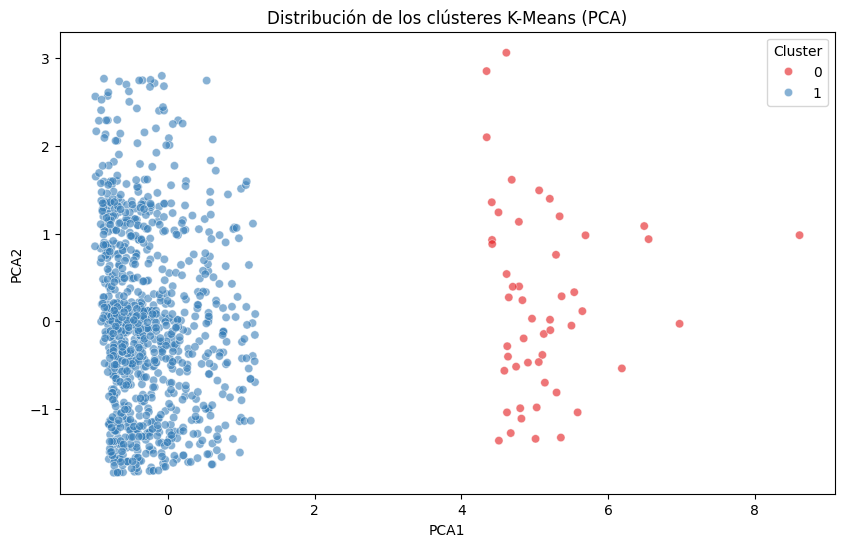

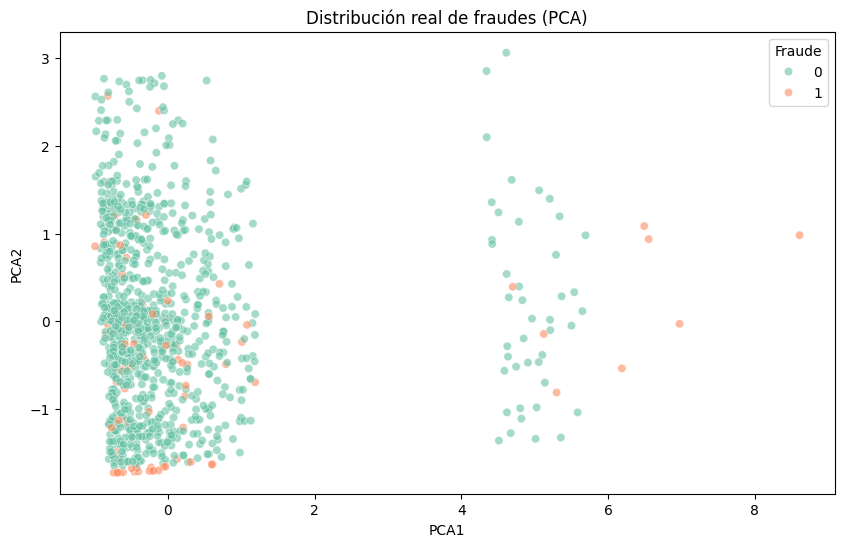

In [5]:
# Reducción de dimensiones para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualización de clústeres creados por K-Means
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.6)
plt.title('Distribución de los clústeres K-Means (PCA)')
plt.show()

# Visualización comparada con Fraude real
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Fraude', palette='Set2', alpha=0.6)
plt.title('Distribución real de fraudes (PCA)')
plt.show()


In [6]:
from sklearn.metrics import silhouette_score


In [7]:
# Suponiendo que usaste estas variables:
# X_scaled → tus datos normalizados con z-score
# kmeans.labels_ → las etiquetas del modelo K-Means

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5910


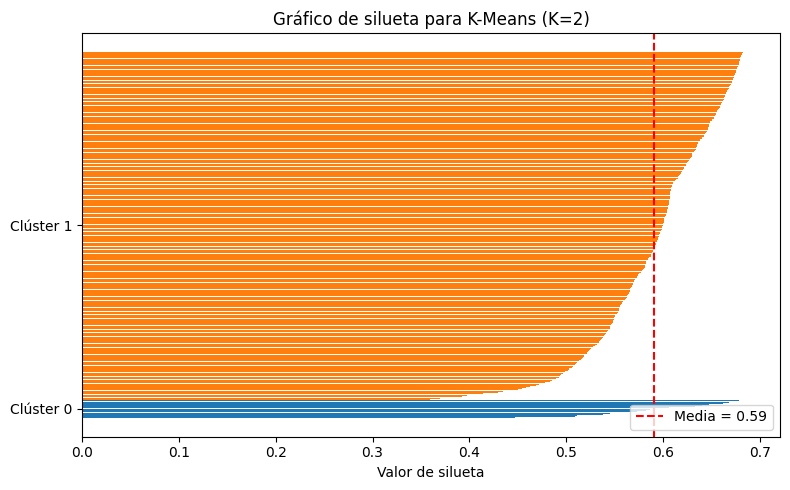

In [8]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Calcular valores de silueta individuales
silhouette_vals = silhouette_samples(X_scaled, kmeans.labels_)

# Crear el gráfico
plt.figure(figsize=(8, 5))
y_ticks = []
y_lower, y_upper = 0, 0
for i in range(2):  # K=2
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none')
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(score, color="red", linestyle="--", label=f"Media = {score:.2f}")
plt.yticks(y_ticks, ["Clúster 0", "Clúster 1"])
plt.xlabel("Valor de silueta")
plt.title("Gráfico de silueta para K-Means (K=2)")
plt.legend()
plt.tight_layout()
plt.show()
